<a href="https://colab.research.google.com/github/alessandra-barbosa/Curso_Programacao_Puc/blob/alessandra/Arvore_de_decisao_sonar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvore de decisão


Ilustra o funcionamento do algoritmo de árvore de decisão com dados contínuos.

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Hugo de Paula

-------------------------------------------------------------------------------

### Base de dados: Sonar, Mines vs. Rocks

https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar,+Mines+vs.+Rocks%29

208 instâncias

60 atributos

2 classes (rocha, mina)



In [ ]:
!pip install pydotplus
!pip install dtreeviz
!pip install graphviz 

     |████████████████████████████████| 61kB 3.6MB/s 


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from google.colab import files
uploaded = files.upload()


Saving sonar.xlsx to sonar (1).xlsx


### Carga dos dados e particionamento das bases de treinamento e teste

### Transformação de dados

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


### Particionamento da base

<code>train_test_split(X, y) -- particiona a base de dados original em bases de treinamento e teste.</code>

No código a seguir, são utilizados 10% para teste e 90% para treinamento.







In [ ]:
sonar = pd.read_excel('sonar.xlsx', sheet_name=0) 
print("\nDimensões: {0}".format(sonar.shape))
print("\nCampos: {0}".format(sonar.keys()))
print(sonar.describe(), sep='\n')

X = sonar.iloc[:,0:(sonar.shape[1] - 1)]

le = LabelEncoder()
y = le.fit_transform(sonar.iloc[:,(sonar.shape[1] - 1)])

# Particiona a base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)





Dimensões: (208, 61)

Campos: Index(['Atributo_1', 'Atributo_2', 'Atributo_3', 'Atributo_4', 'Atributo_5',
       'Atributo_6', 'Atributo_7', 'Atributo_8', 'Atributo_9', 'Atributo_10',
       'Atributo_11', 'Atributo_12', 'Atributo_13', 'Atributo_14',
       'Atributo_15', 'Atributo_16', 'Atributo_17', 'Atributo_18',
       'Atributo_19', 'Atributo_20', 'Atributo_21', 'Atributo_22',
       'Atributo_23', 'Atributo_24', 'Atributo_25', 'Atributo_26',
       'Atributo_27', 'Atributo_28', 'Atributo_29', 'Atributo_30',
       'Atributo_31', 'Atributo_32', 'Atributo_33', 'Atributo_34',
       'Atributo_35', 'Atributo_36', 'Atributo_37', 'Atributo_38',
       'Atributo_39', 'Atributo_40', 'Atributo_41', 'Atributo_42',
       'Atributo_43', 'Atributo_44', 'Atributo_45', 'Atributo_46',
       'Atributo_47', 'Atributo_48', 'Atributo_49', 'Atributo_50',
       'Atributo_51', 'Atributo_52', 'Atributo_53', 'Atributo_54',
       'Atributo_55', 'Atributo_56', 'Atributo_57', 'Atributo_58',
       'At

### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [ ]:
sonar_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
sonar_tree = sonar_tree.fit(X_train, y_train)
print("Acurácia (base de treinamento):", sonar_tree.score(X_train, y_train))

y_pred = sonar_tree.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Mina", "Rocha"]))
      
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mina", "Rocha"], columns=["Mina (prev)", "Rocha (prev)"])
print(cnf_table)



Acurácia (base de treinamento): 1.0
Acurácia de previsão: 0.7142857142857143
              precision    recall  f1-score   support

        Mina       0.60      0.75      0.67         8
       Rocha       0.82      0.69      0.75        13

    accuracy                           0.71        21
   macro avg       0.71      0.72      0.71        21
weighted avg       0.74      0.71      0.72        21

       Mina (prev)  Rocha (prev)
Mina             6             2
Rocha            4             9


### Exibição da árvore de decisão

[Text(1826.1818181818182, 1528.875, 'X[10] <= 0.198\nentropy = 0.993\nsamples = 187\nvalue = [103, 84]'),
 Text(913.0909090909091, 1325.025, 'X[0] <= 0.039\nentropy = 0.796\nsamples = 79\nvalue = [19, 60]'),
 Text(760.909090909091, 1121.175, 'X[15] <= 0.311\nentropy = 0.65\nsamples = 72\nvalue = [12, 60]'),
 Text(304.3636363636364, 917.3249999999999, 'X[27] <= 0.958\nentropy = 0.258\nsamples = 46\nvalue = [2, 44]'),
 Text(152.1818181818182, 713.475, 'entropy = 0.0\nsamples = 42\nvalue = [0, 42]'),
 Text(456.54545454545456, 713.475, 'X[58] <= 0.003\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(304.3636363636364, 509.625, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(608.7272727272727, 509.625, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(1217.4545454545455, 917.3249999999999, 'X[48] <= 0.059\nentropy = 0.961\nsamples = 26\nvalue = [10, 16]'),
 Text(1065.2727272727273, 713.475, 'X[0] <= 0.021\nentropy = 0.792\nsamples = 21\nvalue = [5, 16]'),
 Text(913.0909090909091

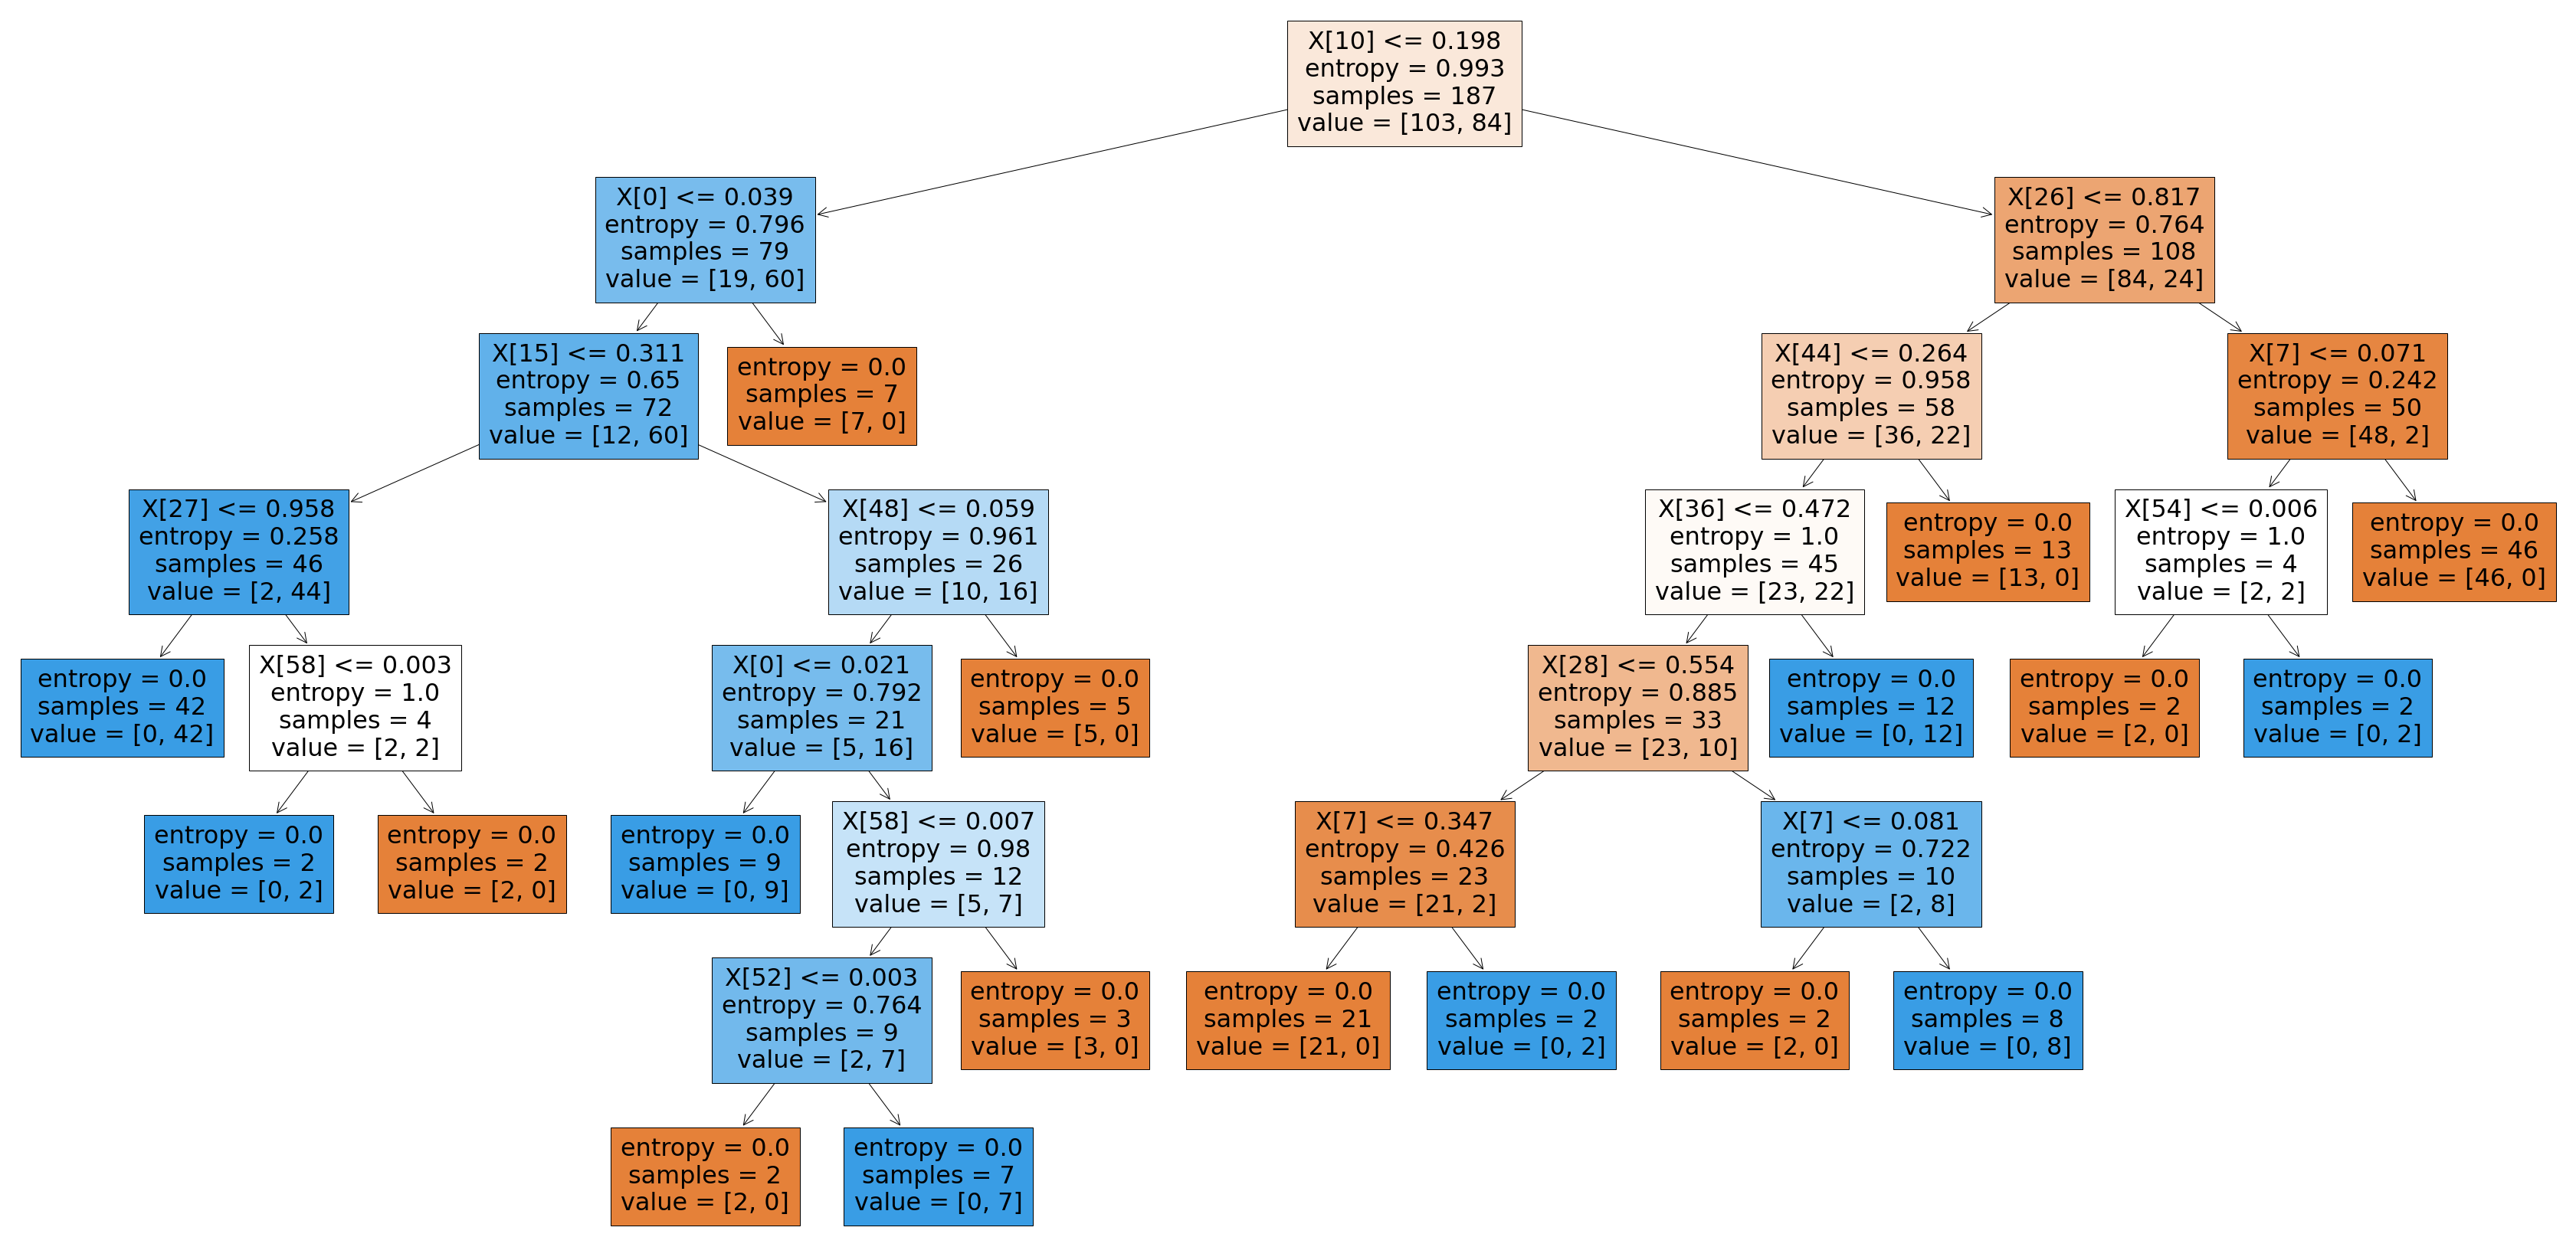

In [ ]:
from dtreeviz.trees import *
plt.figure(figsize=(60,30))
plot_tree(sonar_tree, filled=True)


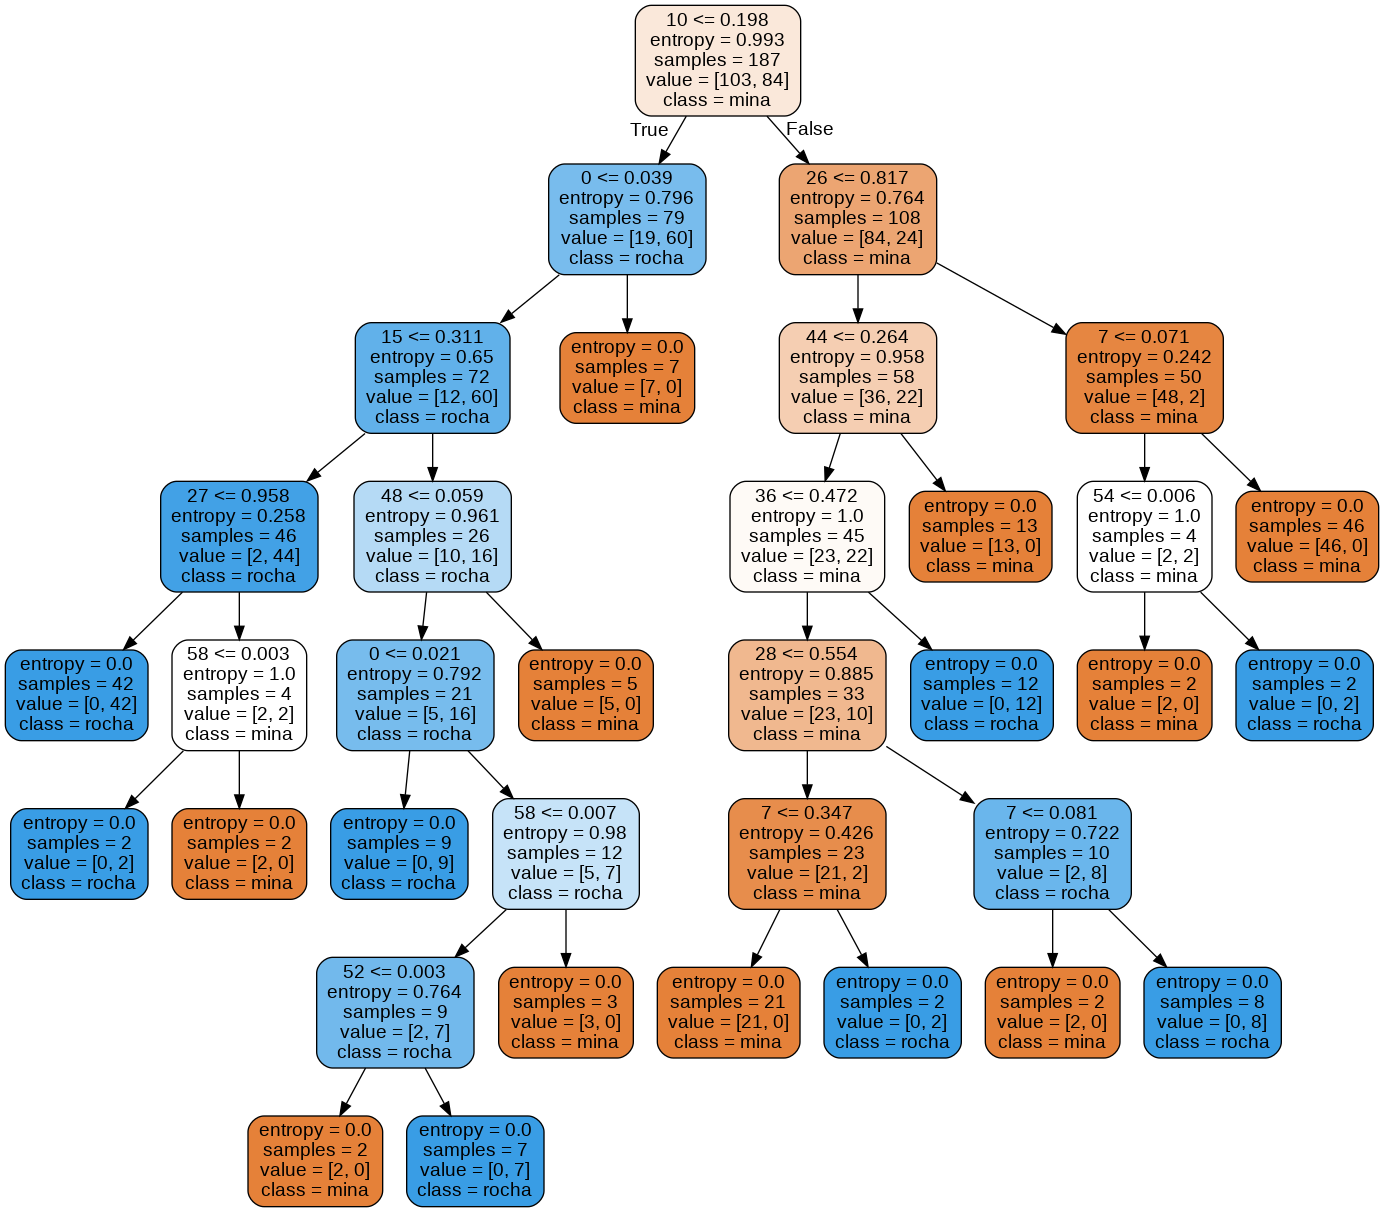

In [ ]:
import pydotplus 
from IPython.display import Image 

# Create DOT data
dot_data = tree.export_graphviz(sonar_tree, out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=np.arange(0,60),  
                                class_names=["mina", "rocha"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())
